#  Classifier

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## Decision Tree
나무의 층을 구성하는 묶음 하나하나를 노드라고 하고, 가장 최상위의 노드를 뿌리라고 한다.  

위에서 첫번째 노드(뿌리)에 동그라미 여러개와 세모 여러개가 들어있다.  
첫번째 갈림길에서 X1>1 여부에 따른다고 한다.  
기준이 X1>1이 아니라 동그라미냐 세모냐?로 물어보면 그건 정답을 그냥 알려줘 버리는게 된다.  

모든 갈림길에서는 X를 통해 갈려지게 되는데, 그럼 어떤 X를 기준으로 잡는게 좋냐?는 알고리즘이 판단한다.  
첫번째에서 갈리면 A노드에 동그라미 몇개 세모 몇개, B노드에 동그라미 몇개 세모 몇개가 들어간다.  

갈림길 기준은 X지만 잘 갈렸는지 확인하는 평가 기준은 Y이다.  
A노드에 동그라미 30개 세모 8개, B노드에 동그라미 2개 세모 20개가 들어갔다면 좋은 평가를 받는다.  
하나의 노드에 동그라미와 세모가 얼마나 섞여있느냐를 불순도라고 한다.  
불순도를 계산하는 방법으로 Gini Index, Entropy가 있다.  
  
불순도를 이용해 좋은 평가를 받은 갈림길 기준 X를 찾는다.  

분기를 해서 얼마의 이득을 얻었는가, 얼마나 구별해냈는가, 얼마나 정보를 얻었는가? 는 불순도의 역수인 IG(Information Gain)이라고 표현한다.(불순도가 작아진 정도)  
X1>10을 기준으로 했더니 IG가 10, X1>20을 기준으로 했더니 IG가 5? Xq>10 기준이 더 좋네! 라고 판단.  

A노드 따로 B노드 따로 새로운 X와 Y를 이용해 최종 노드에 각각 하나씩의 구성요소가 남을 때까지 한다.(동그라미들 끼리도 나름 구별을 해서 나눈다)    
쭉 하다보면 A100노드에 동그라미 한 개, A99노드에 동그라미 한 개, B99노드에 세모 한 개.. 이런 식으로 노드에 하나의 값만이 남을때까지.  
혹은 동그라미끼리 세모끼리만 나눠지게 한다.  

---

[Decision Tree](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)
- [Gini Index](https://wyatt37.tistory.com/9)
- Entroy Index
- Information Gain

가지치기를 통해 나눠지는 걸 과감하게 삭제하는 식으로 overfitting을 막으려하지만 잘 되지는 않는다.  

각 분기의 기준인 X1, X2, X3..... 중 어떤 녀석이 중요하냐? 는 Feature Importance로 알 수 있다.  
각 분기에서 불순도의 변화량인 IG가 큰 놈이 중요하겠지?  

Feature Importance는 IG의 합이다.  
트리 계열 알고리즘의 장점이다. 뭐가 중요한지 쉽게 알 수 있다.  

In [ ]:
!pip install mglearn
import mglearn

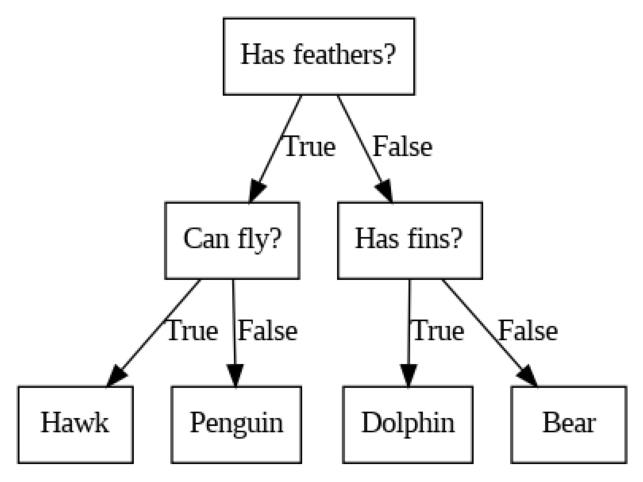

In [ ]:
mglearn.plots.plot_animal_tree()

### 결정 트리 만들기

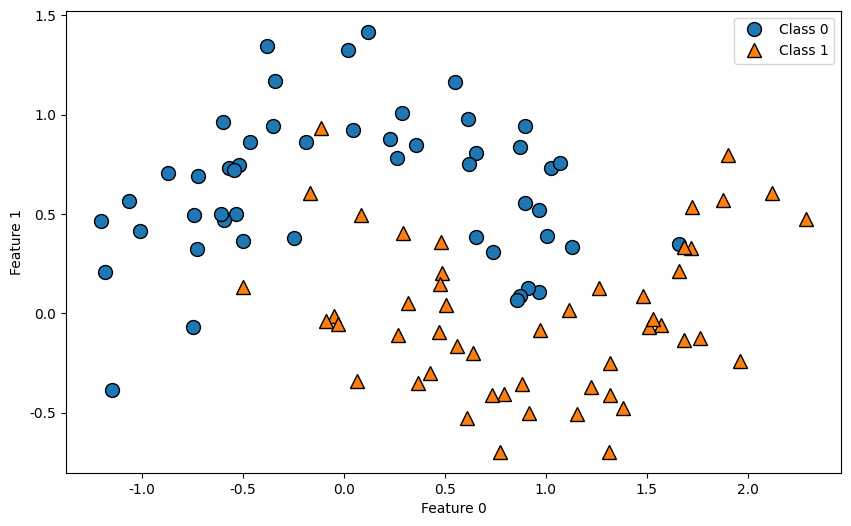

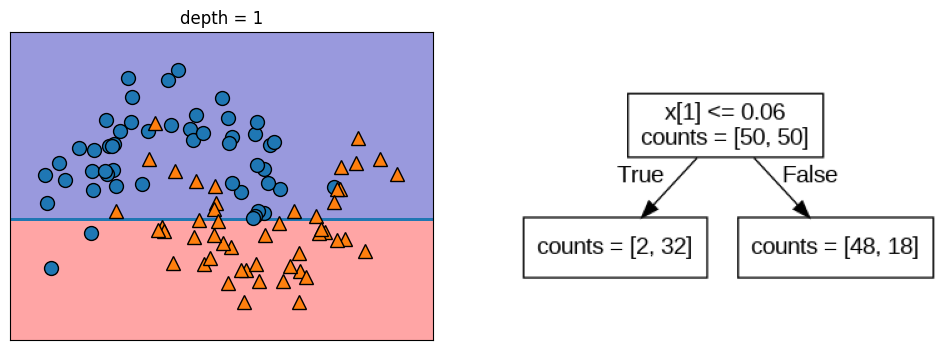

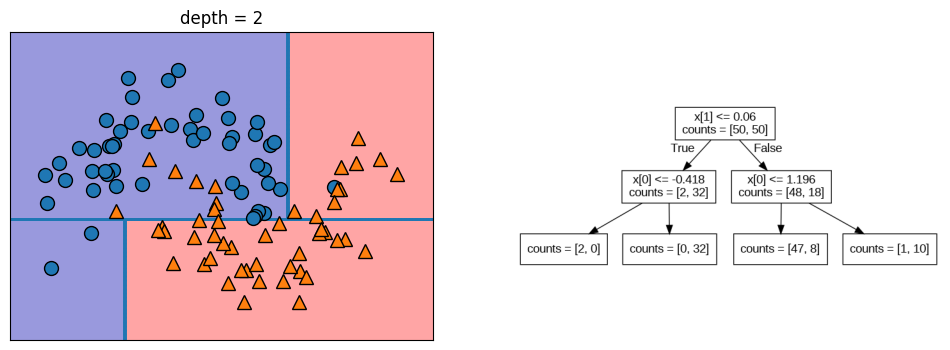

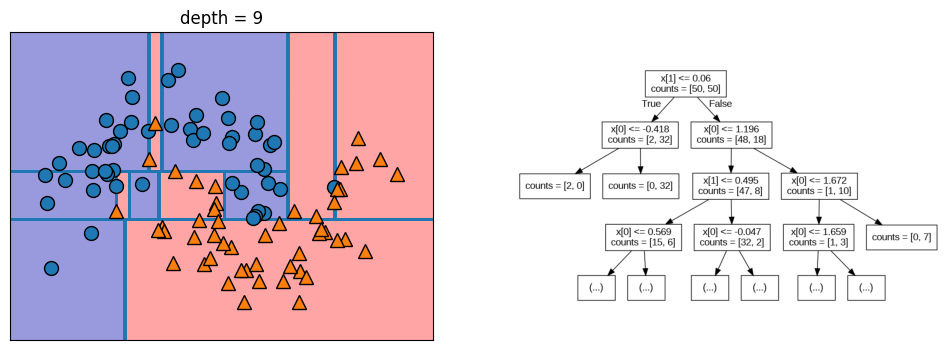

In [ ]:
# 데이터 셋 - two_moons

mglearn.plots.plot_tree_progressive()

### 결정 트리 복잡도 제어 - Overfitting 방지

#### max_depth 조절

In [ ]:
# 데이터 로딩 및 데이터 분할

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=123)

In [ ]:
# 결정 트리 적용

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.923


In [ ]:
# max_depth 조절

tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.923


#### min_samples_leaf 조절
node 하나에 들어있는 입자 수가 n개가 되면 거기서 그만 나눠. 거기서 끝내. 라고 최소 샘플 나뭇잎수를 정해줌.

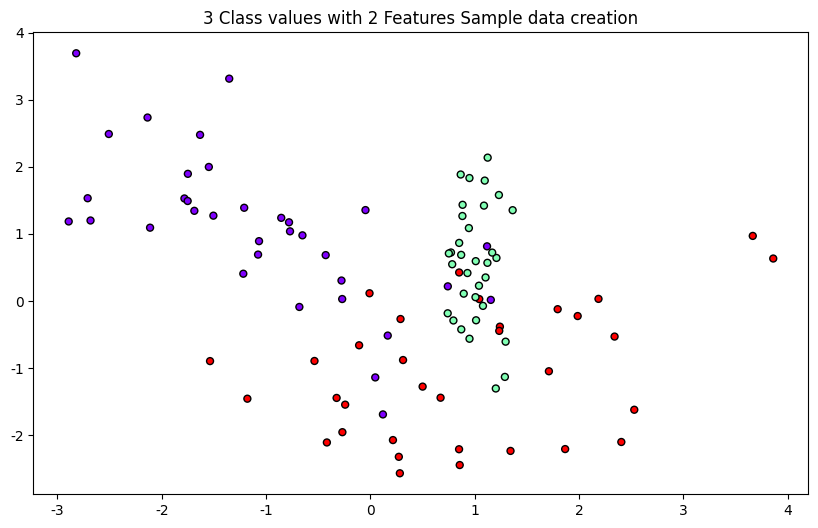

In [ ]:
# 데이터 생성

from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',# clim=(y.min(), y.max()),
                           zorder=1)

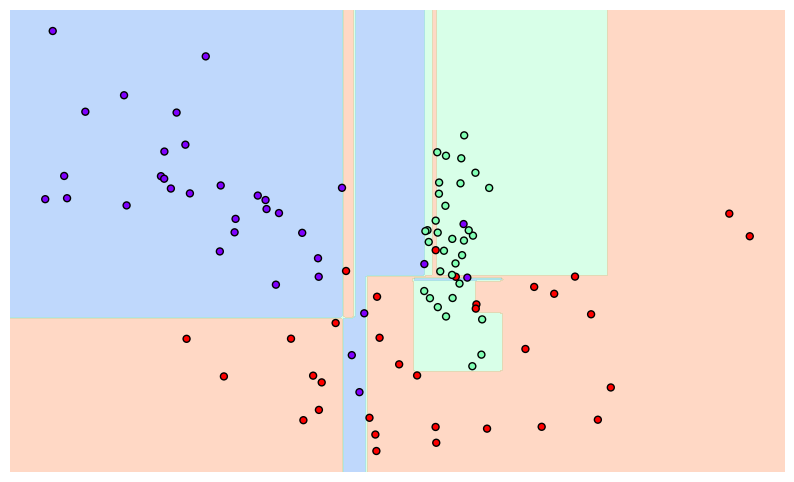

In [ ]:
# 결정 트리 적용

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

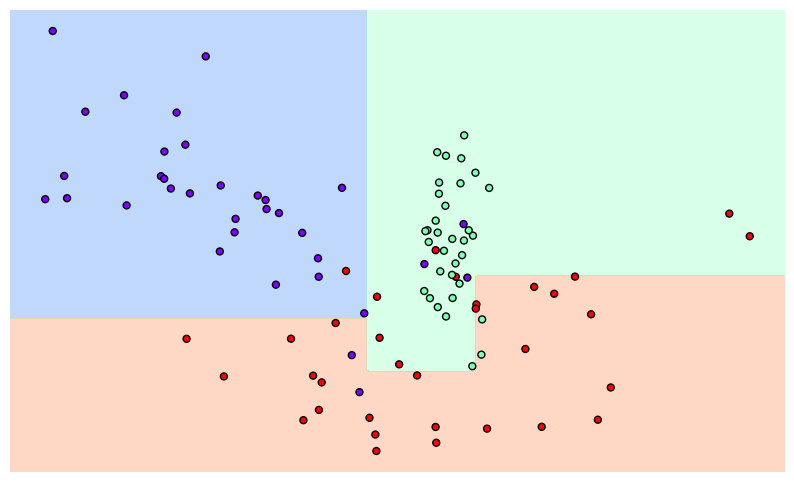

In [ ]:
# min_samples_leaf=6 으로 조절

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels)

In [ ]:
# Visual Python: Machine Learning > Classifier
from sklearn.tree import DecisionTreeClassifier

model_D1 = DecisionTreeClassifier()

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
model_D1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
pred = model_D1.predict(X_test)
pred

array([2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0,
       2, 1, 1])

In [ ]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [ ]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [ ]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,2,All
row_0,,,,
0,6,1,1,8
1,2,5,2,9
2,0,2,6,8
All,8,8,9,25


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.62      0.56      0.59         9
           2       0.67      0.75      0.71         8

    accuracy                           0.68        25
   macro avg       0.68      0.69      0.68        25
weighted avg       0.68      0.68      0.68        25



In [ ]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.68


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))

Precision: 0.6783333333333332


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Recall
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))

Recall: 0.68


In [ ]:
# Visual Python: Machine Learning > Evaluation
# F1-score
print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))

F1-score: 0.6776470588235294


In [ ]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]

    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * (df_i['Feature_importance'] / df_i['Feature_importance'].max())
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)

    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)

    if sort:
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else:
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')

    plt.show()

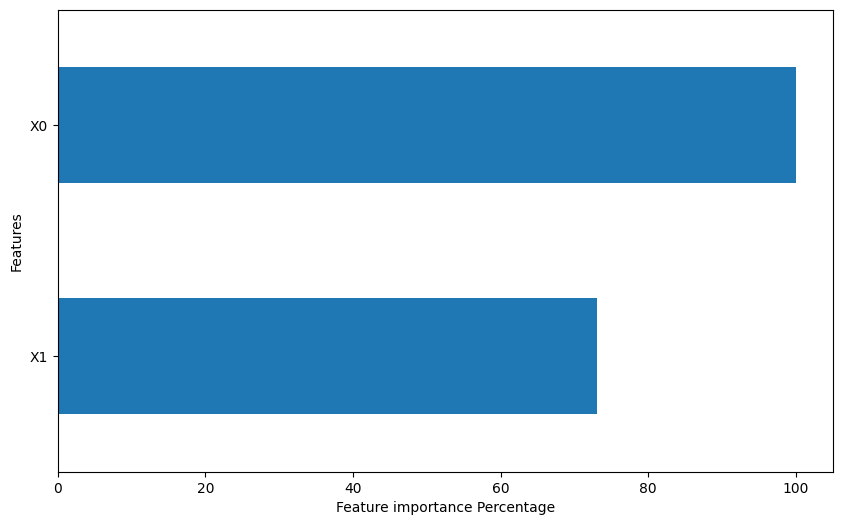

In [ ]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_D1, X_train, sort=True)

### 결정 트리 분석
- 결정 트리 시각화

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='./drive/MyDrive/Colab Notebooks/Machine Learning/tree.dot', class_names=['악성', '양성'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
pip install graphviz

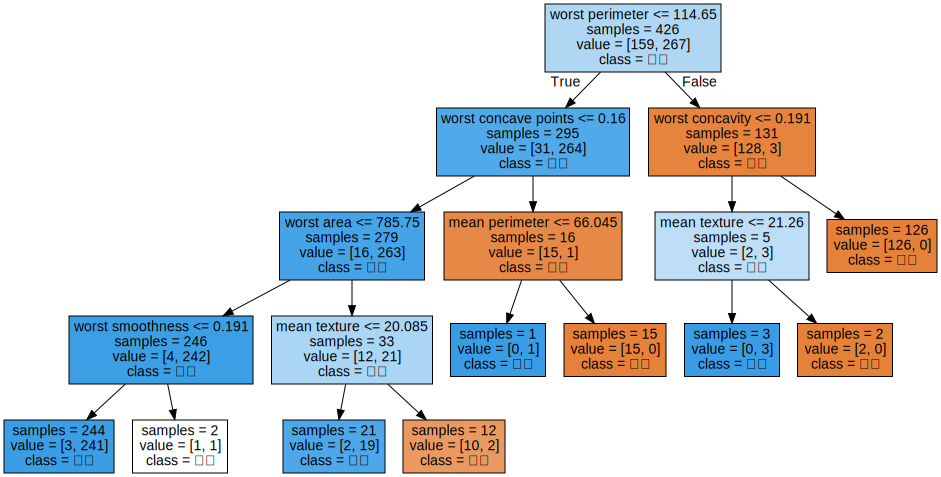

In [ ]:
import graphviz

with open('./drive/MyDrive/Colab Notebooks/Machine Learning/tree.dot', encoding='utf8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

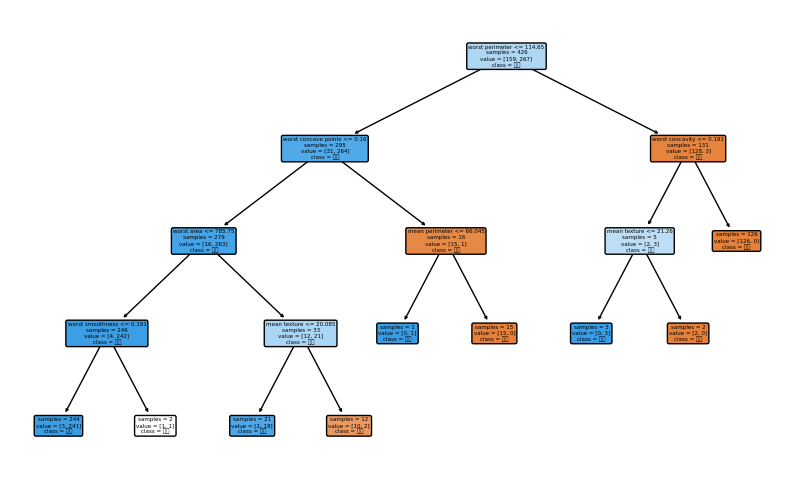

In [ ]:
from sklearn.tree import plot_tree

plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

### 결정 트리의 특성 중요도
- Feature Importance

#### <참고>  [Permutation Feature Importance](https://wooono.tistory.com/328) - 모든 모델에 적용 가능

In [ ]:
print('특성 중요도:\n', tree.feature_importances_)

특성 중요도:
 [0.         0.05781305 0.01011156 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.744009   0.03786972
 0.00508916 0.         0.0186732  0.12643431 0.         0.        ]


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  

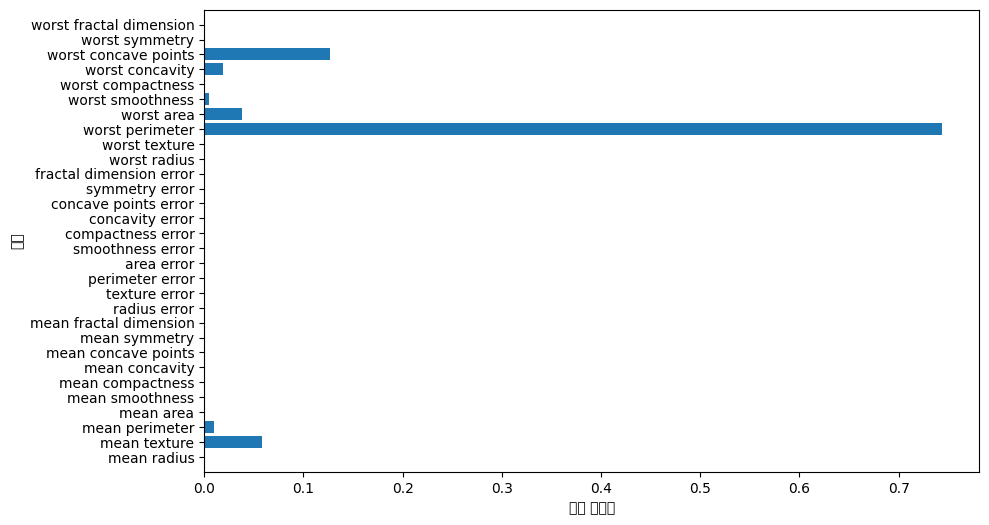

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


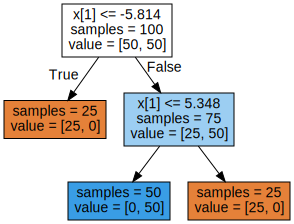

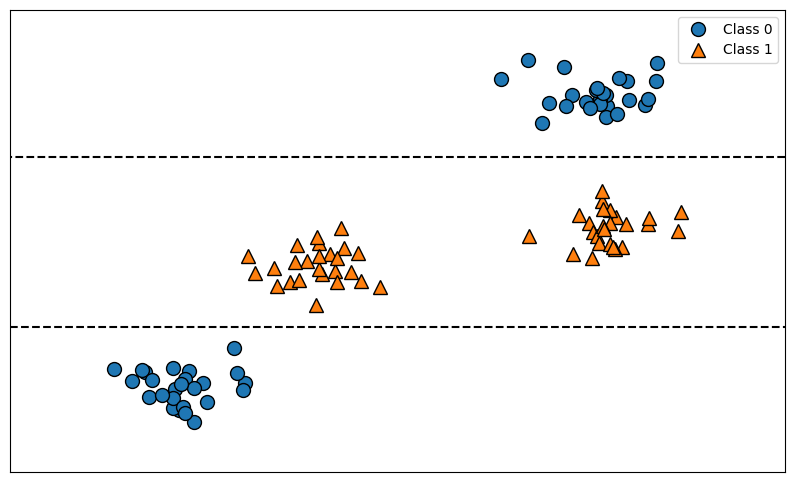

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
tree

### 결정 트리 & 선형 회귀 비교
- 램 가격 동향(수치 예측)
- 결정 트리: 훈련 데이터 범위 밖의 데이터 예측 불가

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


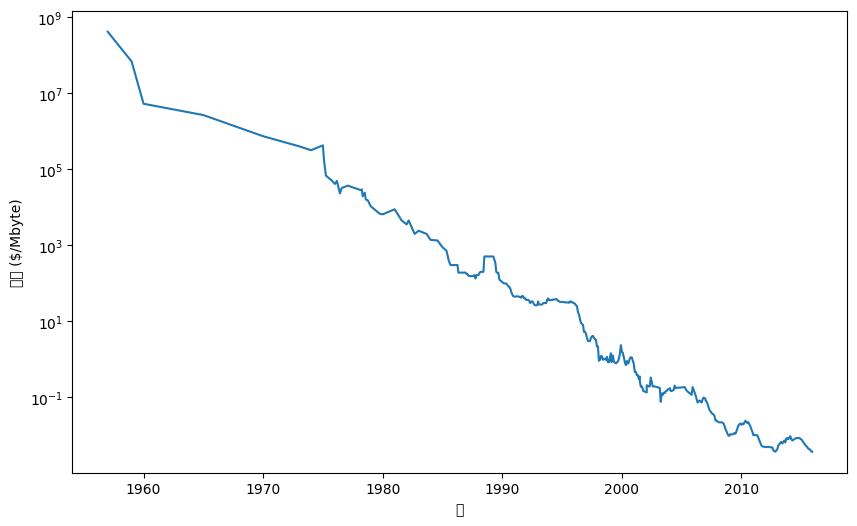

In [ ]:
# 데이터 로딩

ram_prices = pd.read_csv('./drive/MyDrive/Colab Notebooks/Machine Learning/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')
plt.show()

In [ ]:
# 결정 트리 & 선형 회귀

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

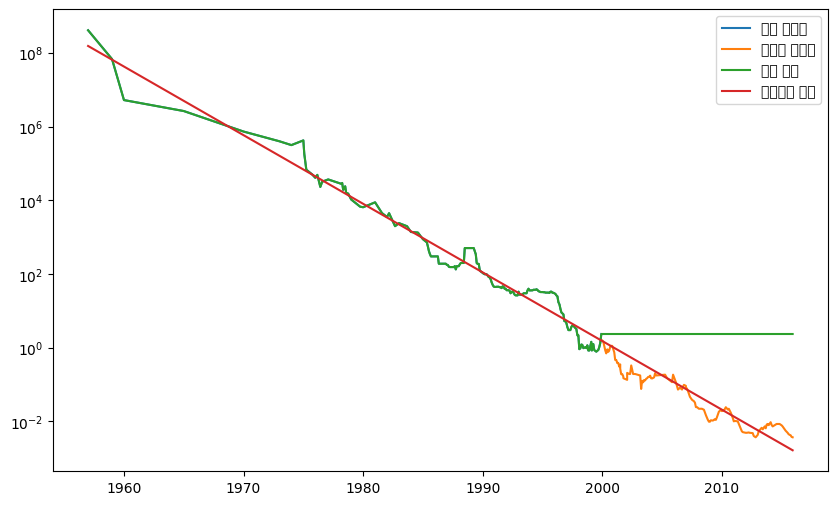

In [ ]:
# 시각화: 결정트리 & 선형 회귀

plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()
plt.show()

훈련할 때 갖고 있지 않았던 데이터에 대해서는 예측할 수 없기에 2000 이상에서 마지막 node로 그냥 찍고 말아버림.  

In [ ]:
# Visual Python: Machine Learning > Data Sets
from sklearn.datasets import load_diabetes

ldata = load_diabetes()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['target'] = ldata.target
df_ldata

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


R square: -0.15407420142718564
MAE: 59.8018018018018
MAPE: 52.976476300991685
RMSE: 76.06493195864881


### Regression plot

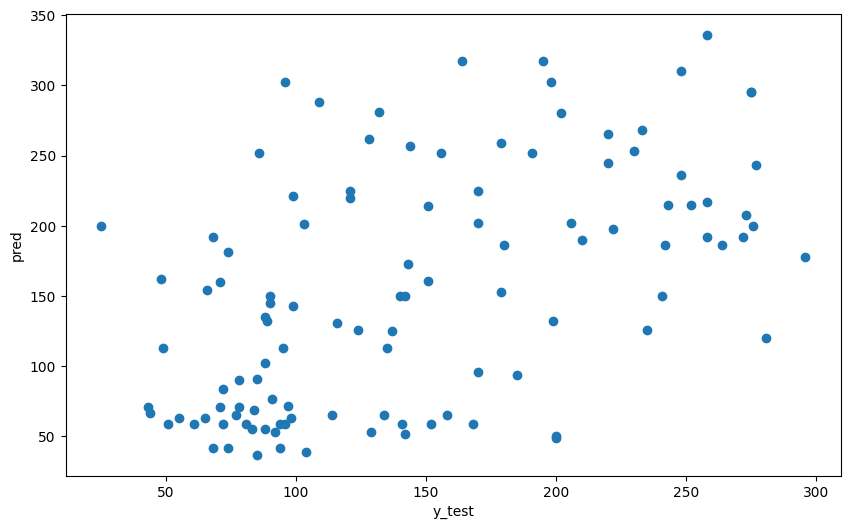

In [ ]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ldata[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']], df_ldata['target'])

# [2] Regressor
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()

# [3] Fit
model_DTR.fit(X_train, y_train)

# [4] Predict
pred = model_DTR.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# R square
print('R square: {}'.format(metrics.r2_score(y_test, pred)))
# MAE(Mean Absolute Error)
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
# MAPE(Mean Absolute Percentage Error)
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100

print('MAPE: {}'.format(MAPE(y_test, pred)))
# RMSE(Root Mean Squared Error)
print('RMSE: {}'.format(metrics.mean_squared_error(y_test, pred)**0.5))
# Regression plot
display(Markdown('### Regression plot'))
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

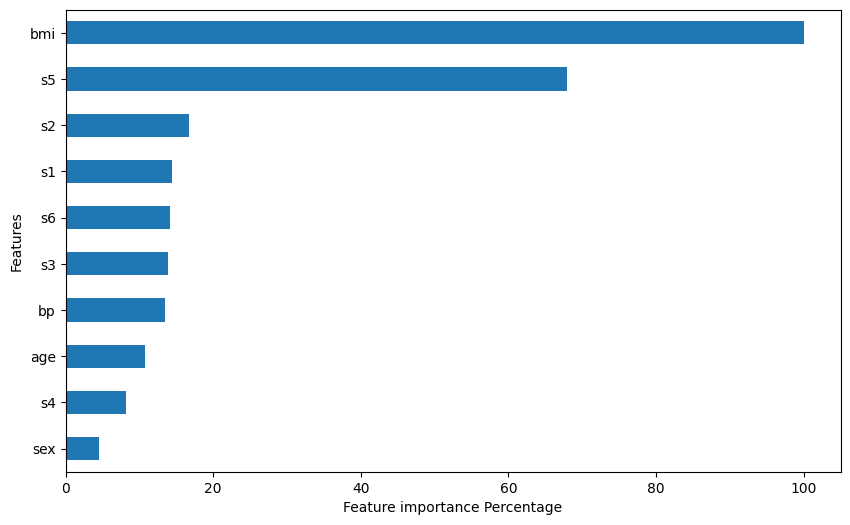

In [ ]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_DTR, X_train, sort=True)

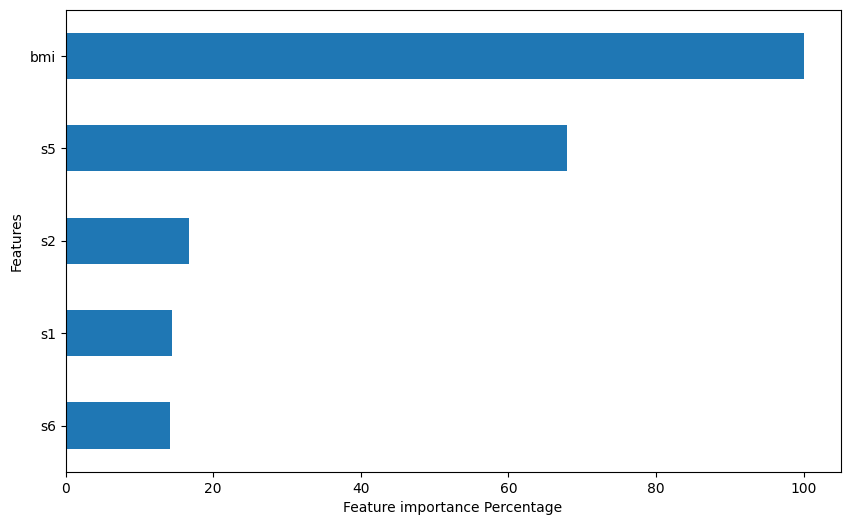

In [ ]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_DTR, X_train, sort=True, top_count=5)

## Ensemble

- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 수행
- Overfitting 방지 -> Decision Tree와 궁합이 잘 맞음

| 구분            | 지도 학습                                                | 비고            |
| --------------- | ------------------------------------------------------- | --------------- |
| 보팅(Voting)   | 서로 다른 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 보팅 (Hard Voting / Soft Voting) | 랜덤 포레스트 |
| 배깅(Bagging)   | 단일 결정 트리로 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅                   | 랜덤 포레스트 |
| 부스팅(Boosting) | 여러 개의 분류기가 순차적으로 학습하면서 앞에서 학습한 분류기가 틀린 데이터에 대해서는 가중치를 부여하면서 학습과 예측을 진행 | GBM, XGBoost    |
| 스태킹(Stacking) | 스태킹은 여러가지 다른 모델의 예측 결과값을 다시 학습데이터로 만들어 다른 모델로 재학습시켜 결과를 예측하는 방법 | -               |


머신러닝 앙상블(ensemble)은 여러 모델을 결합하여 예측 성능을 향상시키는 방법입니다. 앙상블 기법에는 여러 가지가 있으며, 각각의 방법은 모델을 결합하는 방식이 다릅니다. 주요 앙상블 기법인 voting, bagging, boosting, stacking에 대해 설명하겠습니다.

### 1. Voting
Voting은 여러 분류기의 예측 결과를 결합하여 최종 예측을 결정하는 방법입니다. Voting은 주로 분류 문제에 사용되며, 두 가지 유형이 있습니다:
- **Hard Voting**: 각 모델의 예측 결과 중 다수결에 따라 최종 예측을 결정합니다. 예를 들어, 세 모델 중 두 모델이 'A'라고 예측하면 최종 예측도 'A'가 됩니다.
- **Soft Voting**: 각 모델의 예측 확률을 평균 내어 최종 예측을 결정합니다. 예를 들어, 세 모델이 각각 0.7, 0.6, 0.8의 확률로 'A'를 예측하면, 평균 확률이 0.7로 최종 예측이 'A'가 됩니다.
---
### 2. Bagging (Bootstrap Aggregating)
Bagging은 데이터의 랜덤 샘플링과 모델의 결합을 통해 예측 성능을 향상시키는 방법입니다. 주로 회귀와 분류 문제에 사용됩니다.
- **샘플링**: 원본 데이터에서 중복을 허용하여 여러 샘플 세트를 만듭니다. 이를 bootstrap 샘플링이라고 합니다.
- **모델 훈련**: 각 샘플 세트에 대해 동일한 유형의 모델을 훈련시킵니다.
- **결합**: 각 모델의 예측 결과를 평균(회귀)하거나 다수결(분류)로 결합하여 최종 예측을 만듭니다.  
  

**대표적인 예**: 랜덤 포레스트(Random Forest)는 다수의 결정 트리를 bagging 기법으로 결합한 것입니다.  

---

### 3. Boosting
Boosting은 모델을 순차적으로 학습시키고, 이전 모델이 잘못 예측한 데이터를 다음 모델이 더 잘 예측하도록 개선하는 방법입니다.
- **순차적 학습**: 모델을 순차적으로 훈련시키며, 각 모델은 이전 모델의 오류를 보완하도록 학습합니다.
- **가중치 부여**: 잘못 예측된 데이터에 가중치를 부여하여 다음 모델이 더 잘 학습하도록 합니다.
- **결합**: 각 모델의 예측 결과를 가중치 합으로 결합하여 최종 예측을 만듭니다.

**대표적인 예**: AdaBoost, Gradient Boosting, XGBoost 등

---

### 4. Stacking
Stacking은 여러 개의 서로 다른 모델을 결합하여 최종 예측을 만드는 방법입니다. 각 모델의 예측 결과를 입력으로 사용하여 메타 모델을 학습시킵니다.
- **기본 모델**: 서로 다른 유형의 여러 모델을 훈련시킵니다.
- **메타 모델**: 기본 모델의 예측 결과를 입력으로 사용하여 최종 예측을 만드는 모델을 훈련시킵니다.

**절차**:
1. 여러 개의 기본 모델을 훈련시킵니다.
2. 각 기본 모델의 예측 결과를 수집합니다.
3. 메타 모델(블렌더)을 훈련시킵니다. 이 모델은 기본 모델의 예측 결과를 입력으로 사용합니다.
4. 최종 예측을 만듭니다.

**대표적인 예**: 기본 모델로는 로지스틱 회귀, 결정 트리, 랜덤 포레스트, SVM 등을 사용하고, 메타 모델로는 주로 간단한 모델(예: 로지스틱 회귀)을 사용합니다.

각 앙상블 기법은 서로 다른 특징과 장점을 가지고 있으며, 문제의 특성에 따라 적절한 방법을 선택하여 사용합니다.

Voting은 Decision Tree를 여러개 만들어서 투표(평균)으로 결과를 출력한다.  
Bagging, Boosting에서도 Voting이 쓰인다.  

Bagging: Bootstep aggregating의 약자로 복원추출로 샘플을 여러번 뽑고(트리를 여러개 만들고) aggregation하는 것을 말함.  
(평균을 내든 Voting을 하든... 이런 걸로 가장 유명한게 Random Forest)  

Bagging은 샘플을 여러번 뽑고(트리를 여러개 만들고) 마지막에 aggregation하는데, Boosting은 샘플 뽑고(트리 만들고) aggregation해서 결과 내고, 결과 참고해서 샘플 뽑고(트리 만들고) agg하고 결과 내고, 결과 참고해서... 식으로 한다.  

Bagging은 한 번에 할 수 있으니 Boosting은 순차적으로 해야하니 시간이 오래 걸리겠지?(성능은 더 좋음)  
(Gradient Boosting Machine, eXtraGradient Boost, Category Boost 등이 있다.)  

Stacking은 트리모델을 만들어 예측하고, 트리모델 만들어 예측하고...그 여러개의 트리모델을 합쳐서 하나의 모델을 만들고, 그 모델을 학습시킬 정답은 각 모델의 예측값을 합친 것으로 한다.  
진짜 정답이 아닌 예측값들을 정답이랍시고 주고 학습시키니 결과가 좋진 않지만 overfitting은 예방할 수 있다.  
응. 잘 쓰이지는 않는 방법이다.  

hyperparameter n-estimatores는 위처럼 여러개의 tree를 쓸 때. 그 트리의 갯수를 의미한다.  

일반적으로 초기에는 모델이 충분한 트리를 생성하도록 큰 값을 선택하고, 그런 다음 "early stopping"을 사용하여 적절한 트리 개수를 결정합니다.  
**"n_estimators"를 크게 설정하면 모델은 더 많은 트리를 생성할 수 있으며, 더 복잡한 모델을 만들 수 있습니다. 이를 통해 모델의 표현력이 향상될 수 있습니다.**  

**"early stopping round"는 훈련 도중 검증 데이터에 대한 성능이 개선되지 않을 때 훈련을 조기 종료하기 위해 사용하는 기술 또는 하이퍼파라미터입니다.**  
이를 사용하여 모델이 불필요하게 많은 트리를 생성하지 않도록 하고, 과적합을 방지하며 효율적인 모델을 만듭니다.  

비주얼파이선에는 early stopping round가 없으니 user option 이용하셈

### Random Forest
[Random Forest](https://injo.tistory.com/30)
- 회귀 결과 예측 방법: 노드의 값들을 평균
- 분류 결과 예측 방법: 범주의 갯수 카운팅
  - [Hard voting, Soft voting](https://devkor.tistory.com/entry/Soft-Voting-%EA%B3%BC-Hard-Voting)

#### max feature

X1, X2....X10, Y(Target), 행 100 으로 구성된 DataFrame에서 tree 여러개를 이용해 RandomForest를 만들 거다.  
각 tree에서는 100행 중 70개 행을 랜덤으로 뽑아 쓸 거야.  
그리고 X1, X2...X10 중에서도 7개 정도 열만 랜덤으로 뽑아 쓸 거야.  
랜덤으로 뽑는게 두 종류가 있는거지.  

이때 몇개의 열을 뽑을거냐? 설정하는 hyperparameter가 max-features야.  

모인 tree들의 결과값을 이용해서 voting하여 최종 결과를 내는 것이 hard voting,  
각 tree의 결과값이 나오게 된 이유까지 고려해서 최종 결과를 내는 것이 soft voting이다.  

#### Random Forest 모델 생성

In [ ]:
# 데이터 생성 & 데이터 분할

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

In [ ]:
# 모댈 생성 및 학습 - Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=123)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=123)

#### Random Forest 결정 경계 시각화

In [ ]:
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

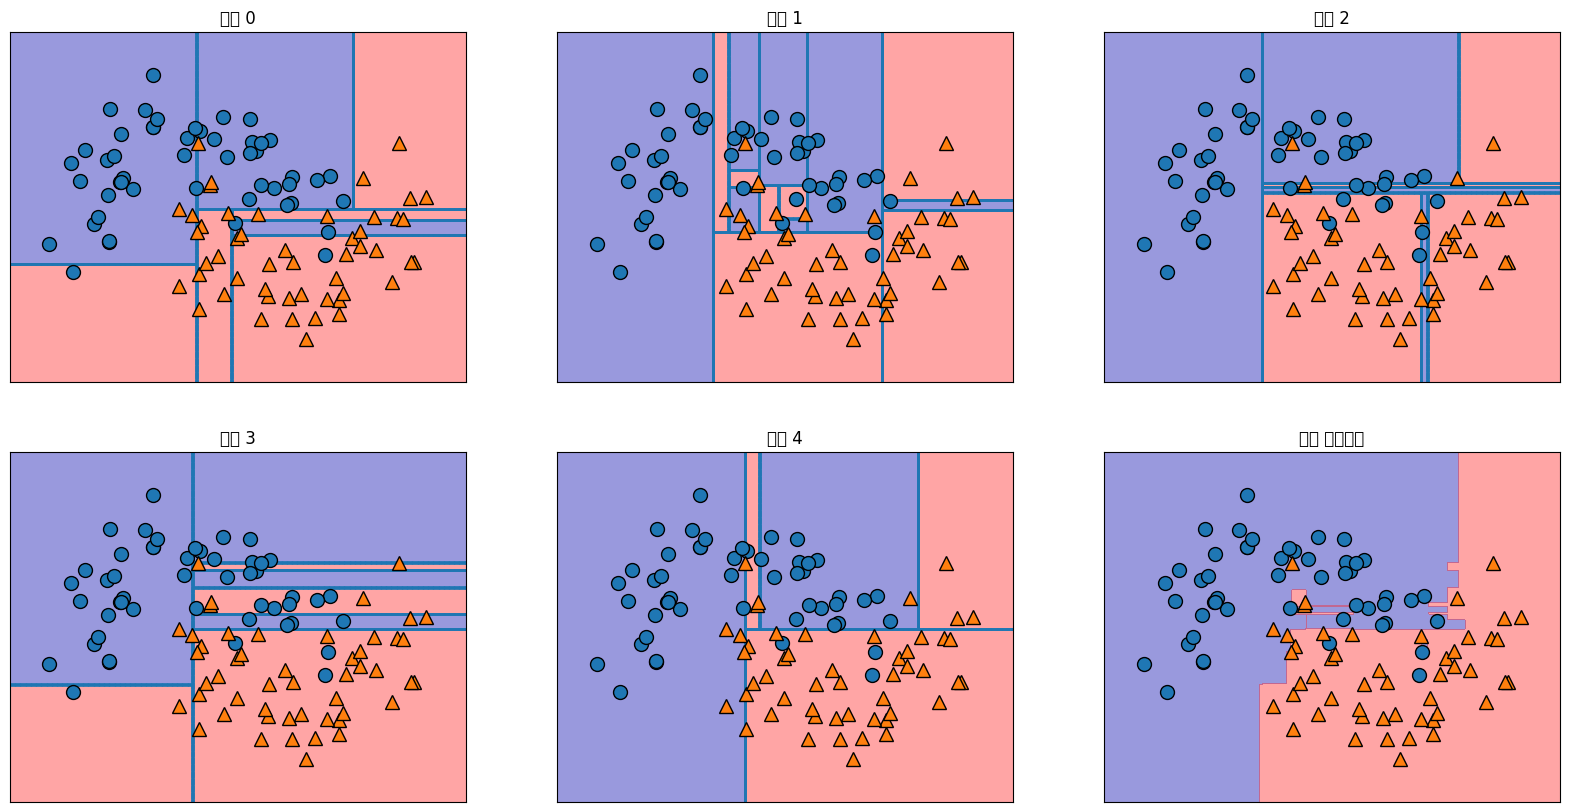

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'트리 {i}')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

axes[-1, -1].set_title('랜덤 포레스트')
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

#### Feature Importance

In [ ]:
# 데이터 생성 & 데이터 분할

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

In [ ]:
# 모댈 생성 및 학습 - Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.993


In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  

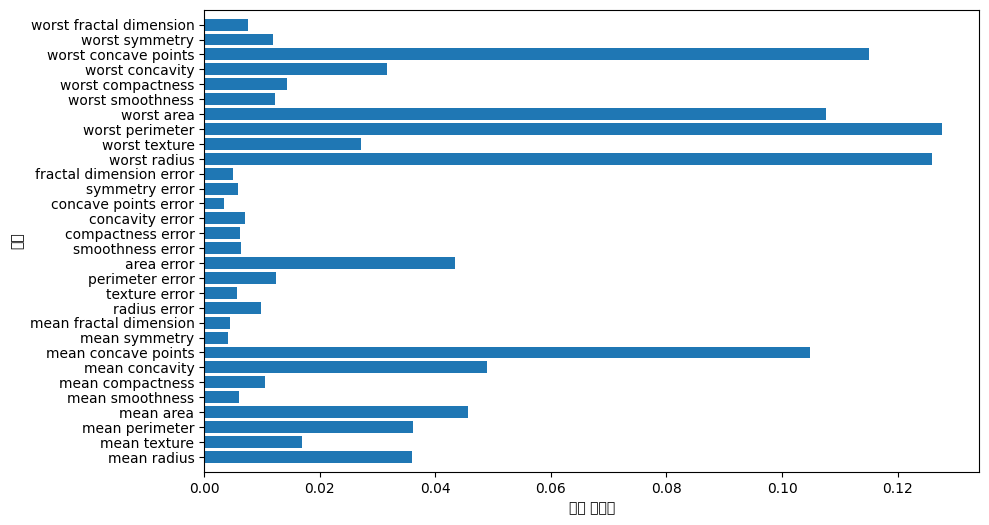

In [ ]:
# Feature Importance

plot_feature_importances_cancer(forest)

In [ ]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model_R1 = RandomForestClassifier()

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
model_R1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
pred = model_R1.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0])

In [ ]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [ ]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [ ]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
row_0,,,
0,10,0,10
1,2,13,15
All,12,13,25


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



In [ ]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.92


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))

Precision: 0.9333333333333335


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Recall
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))

Recall: 0.92


In [ ]:
# Visual Python: Machine Learning > Evaluation
# F1-score
print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))

F1-score: 0.9207792207792207


In [ ]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]

    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * (df_i['Feature_importance'] / df_i['Feature_importance'].max())
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)

    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)

    if sort:
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else:
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')

    plt.show()

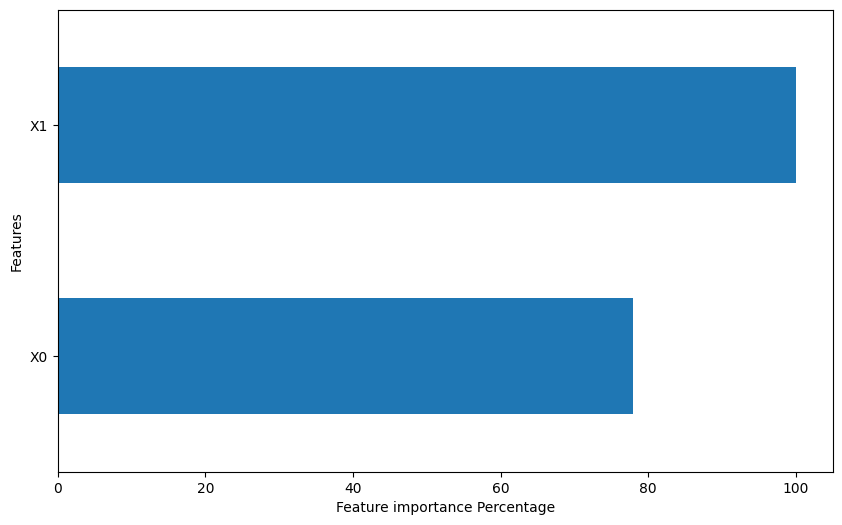

In [ ]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_R1, X_train, sort=True)

### GBM - Gradient Boosting Machine

GBM은 너무 오래 걸려서 boosting 계열 쓸거면 웬만하면 XGBoost 쓰시고, Bagging 계열은 RandomForest 쓰세요

[AdaBoost](https://dailyheumsi.tistory.com/115?category=877153)  
[GBM](https://dailyheumsi.tistory.com/116?category=877153)  
[GBM](https://yngie-c.github.io/machine%20learning/2021/03/21/gbm/)

AdaBoost와 Gradient Boosting Machine(GBM)은 둘 다 부스팅(Boosting) 기법에 속하지만, 그 학습 방식과 적용 방법에서 차이가 있습니다. 각 기법에 대해 자세히 설명해드리겠습니다.

### AdaBoost (Adaptive Boosting)

**개념**:
- AdaBoost는 여러 약한 학습기(weak learners)를 결합하여 강한 학습기(strong learner)를 만드는 방법입니다. 주로 단순한 결정 트리(stumps)를 약한 학습기로 사용합니다.

**작동 방식**:
1. **초기 가중치 설정**: 모든 훈련 샘플에 동일한 가중치를 부여합니다.
2. **약한 학습기 훈련**: 첫 번째 약한 학습기를 훈련시킵니다.
3. **오류율 계산**: 약한 학습기의 예측 오류율을 계산합니다.
4. **가중치 업데이트**: 잘못 예측된 샘플의 가중치를 증가시키고, 잘 예측된 샘플의 가중치를 감소시킵니다. 이렇게 하면 다음 약한 학습기는 어려운 샘플에 더 집중하게 됩니다.
5. **반복**: 여러 번 반복하여 새로운 약한 학습기를 추가합니다. 각 학습기는 이전 학습기의 오류를 보완하도록 훈련됩니다.
6. **결합**: 모든 약한 학습기의 예측 결과를 가중 평균하여 최종 예측을 만듭니다.

**특징**:
- 각 약한 학습기는 이전 학습기의 오류를 보완하도록 훈련됩니다.
- 잘못 예측된 샘플에 가중치를 증가시켜 학습기가 어려운 샘플에 더 집중하게 합니다.

**장점**:
- 구현이 비교적 간단하고, 약한 학습기들이 결합하여 성능이 향상됩니다.
- 노이즈 데이터에 덜 민감합니다.

**단점**:
- 너무 많은 약한 학습기를 사용하면 과적합이 발생할 수 있습니다.
- 데이터의 노이즈가 너무 많을 경우 성능이 저하될 수 있습니다.

### Gradient Boosting Machine (GBM)

**개념**:
- GBM은 부스팅 기법의 일종으로, 잔여 오차(residual error)를 최소화하기 위해 학습기를 순차적으로 추가하는 방식입니다. 주로 결정 트리(decision trees)를 학습기로 사용합니다.

**작동 방식**:
1. **초기 모델 학습**: 첫 번째 학습기는 전체 데이터에 대해 학습하여 예측을 만듭니다.
2. **잔여 오차 계산**: 첫 번째 모델의 예측과 실제 값의 차이인 잔여 오차를 계산합니다.
3. **잔여 오차 예측**: 새로운 학습기를 훈련시켜 이전 모델의 잔여 오차를 예측합니다.
4. **모델 업데이트**: 새로운 학습기를 기존 모델에 추가하여 잔여 오차를 보완합니다. 이를 통해 모델이 점진적으로 개선됩니다.
5. **반복**: 여러 번 반복하여 새로운 학습기를 추가합니다. 각 학습기는 이전 학습기의 잔여 오차를 예측하여 보완합니다.
6. **결합**: 모든 학습기의 예측 결과를 합하여 최종 예측을 만듭니다.

**특징**:
- 각 새로운 학습기는 이전 학습기의 잔여 오차를 최소화하도록 훈련됩니다.
- 모델이 순차적으로 학습되므로, 잔여 오차가 점진적으로 줄어듭니다.

**장점**:
- 높은 예측 정확도를 제공합니다.
- 다양한 손실 함수를 사용할 수 있어 유연성이 높습니다.

**단점**:
- 많은 학습기를 사용하면 계산 비용이 많이 들 수 있습니다.
- 과적합을 방지하기 위해 정규화나 조기 종료 등의 기법이 필요합니다.

**비교**:
- **AdaBoost**는 잘못 예측된 샘플의 가중치를 증가시켜 다음 학습기가 어려운 샘플에 더 집중하게 하는 방식입니다.
- **GBM**은 잔여 오차를 최소화하도록 새로운 학습기를 순차적으로 추가하는 방식입니다. 각 학습기는 이전 학습기의 오류를 보완합니다.

두 기법 모두 예측 성능을 향상시키기 위해 여러 모델을 결합하는 부스팅 기법이지만, 그 방법론과 적용 방식에서 차이가 있습니다. 문제의 특성과 데이터에 따라 적절한 부스팅 기법을 선택하여 사용하면 됩니다.

AdaBoost  
Boosting model 중 하나로 하나의 트리에서 결과를 내고, 그 결과값에서 틀린 것에 가중치를 주고 다른 샘플을 뽑고 다음 트리를 만들어 결과값을 낸다. 그 결과값에서 틀린 것에 또 가중치를 주고 다른 샘플을 뽑고 다음 트리를 만든다...  

GBM  
하나의 트리에서 나온 결과값과 실제 정답의 차이(잔차)를 본다. 그 잔차가 적어지게 트리를 만들어 또 잔차를 본다.... 각각의 트리에 가중치를 붙여주는데, 트리가 얼마나 잘 맞췄는지(잔차를 얼마나 줄였느냐)에 따라 가중치를 다르게 준다.   

근데, 순차적으로 트리를 생성해서 가는거다 보니 가중치를 어떻게 설정해야 하냐? 뭐가 제일 우수한지 모르잖아? 새로운 트리가 생겨날때마다 상대적으로 봐 가며 누가 얼마나 잘 맞췄는지는 경사하강법을 통해 찾는다. 가중치는 계속해서 변화한다.  

- 회귀: 잔차를 예측
- 분류: logloss 예측

#### GBM 적용

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


#### max_depth = 1

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


#### 학습률 조정 - learning_rate = 0.01

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


#### Feature Importance

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  

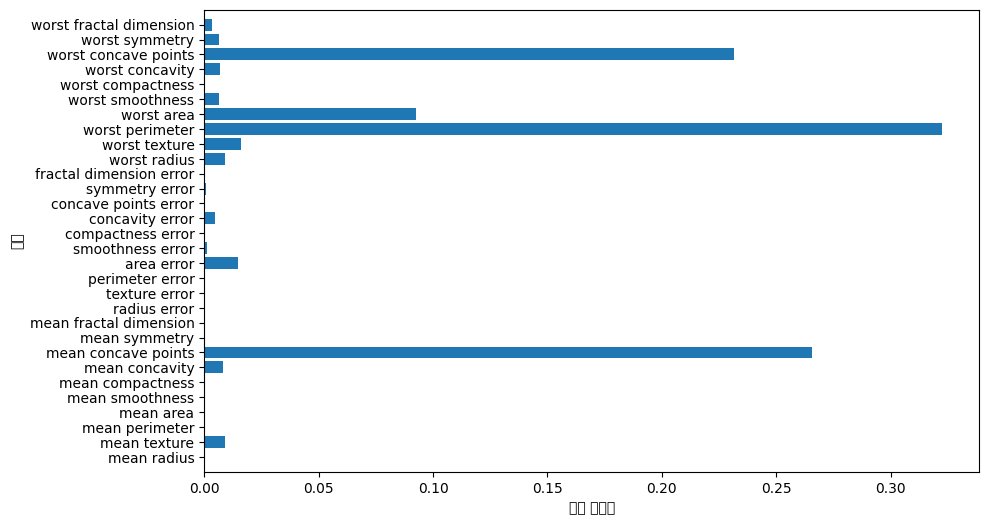

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [ ]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GBM = GradientBoostingClassifier(max_depth=1)

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
model_GBM.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1)

In [ ]:
# Visual Python: Machine Learning > Fit/Predict
pred = model_GBM.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [ ]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
row_0,,,
0,51,2,53
1,2,88,90
All,53,90,143


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.972027972027972


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))

Precision: 0.972027972027972


In [ ]:
# Visual Python: Machine Learning > Evaluation
# Recall
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))

Recall: 0.972027972027972


In [ ]:
# Visual Python: Machine Learning > Evaluation
# F1-score
print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))

F1-score: 0.972027972027972


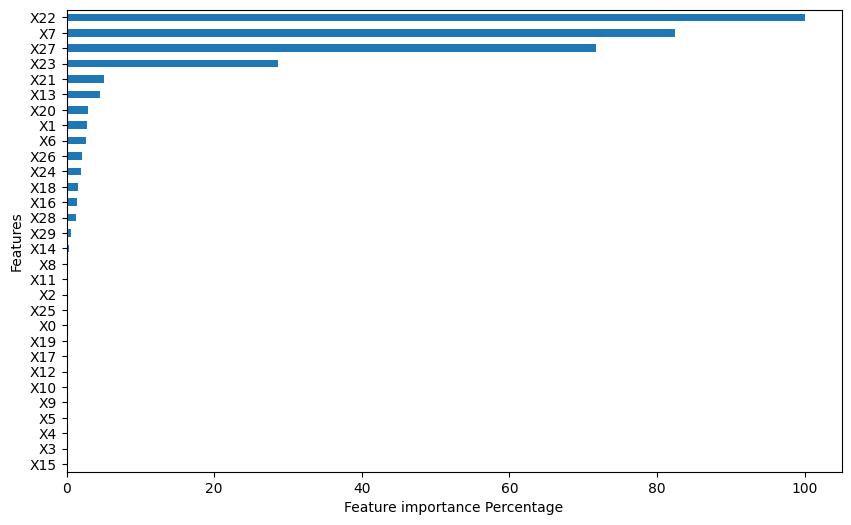

In [ ]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_GBM, X_train, sort=True)

### XGBoost - eXtra Gradient Boost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

2.0.3


In [ ]:
# 데이터 로딩: 위스콘신 Breast Cancer 데이터 셋

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
df = pd.DataFrame(data=X, columns=cancer.feature_names)
df['target']= y
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
print(cancer.target_names)

['malignant' 'benign']


In [ ]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [ ]:
# XGBoost 모델 생성 및 학습

from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)

xgb.fit(X_train, y_train, early_stopping_rounds=400, eval_set=evals, eval_metric='logloss', verbose=True)
#regression은 잔차, classification은 logloss 이용

[0]	validation_0-logloss:0.57574


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.51024
[2]	validation_0-logloss:0.45606
[3]	validation_0-logloss:0.41211
[4]	validation_0-logloss:0.37292
[5]	validation_0-logloss:0.34081
[6]	validation_0-logloss:0.31115
[7]	validation_0-logloss:0.28527
[8]	validation_0-logloss:0.26366
[9]	validation_0-logloss:0.24322
[10]	validation_0-logloss:0.22644
[11]	validation_0-logloss:0.21051
[12]	validation_0-logloss:0.19655
[13]	validation_0-logloss:0.18668
[14]	validation_0-logloss:0.17321
[15]	validation_0-logloss:0.16354
[16]	validation_0-logloss:0.15501
[17]	validation_0-logloss:0.14774
[18]	validation_0-logloss:0.13865
[19]	validation_0-logloss:0.13227
[20]	validation_0-logloss:0.12676
[21]	validation_0-logloss:0.12295
[22]	validation_0-logloss:0.11855
[23]	validation_0-logloss:0.11297
[24]	validation_0-logloss:0.11013
[25]	validation_0-logloss:0.10772
[26]	validation_0-logloss:0.10419
[27]	validation_0-logloss:0.10120
[28]	validation_0-logloss:0.09806
[29]	validation_0-logloss:0.09406
[30]	validation_0-loglo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 결과 예측
pred = xgb.predict(X_test)

In [ ]:
# 평가: 오차 행렬
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)

print('Confusion Matrix\n', confusion)

Confusion Matrix
 [[40  1]
 [ 1 72]]


In [ ]:
# 분류 리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# XGBoost 모델 생성 및 학습 - early_stopping_rounds=100

from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)

xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric='logloss', verbose=True)

[0]	validation_0-logloss:0.57574
[1]	validation_0-logloss:0.51024
[2]	validation_0-logloss:0.45606
[3]	validation_0-logloss:0.41211
[4]	validation_0-logloss:0.37292
[5]	validation_0-logloss:0.34081
[6]	validation_0-logloss:0.31115
[7]	validation_0-logloss:0.28527
[8]	validation_0-logloss:0.26366
[9]	validation_0-logloss:0.24322
[10]	validation_0-logloss:0.22644
[11]	validation_0-logloss:0.21051
[12]	validation_0-logloss:0.19655
[13]	validation_0-logloss:0.18668
[14]	validation_0-logloss:0.17321
[15]	validation_0-logloss:0.16354
[16]	validation_0-logloss:0.15501
[17]	validation_0-logloss:0.14774
[18]	validation_0-logloss:0.13865
[19]	validation_0-logloss:0.13227
[20]	validation_0-logloss:0.12676
[21]	validation_0-logloss:0.12295
[22]	validation_0-logloss:0.11855
[23]	validation_0-logloss:0.11297
[24]	validation_0-logloss:0.11013
[25]	validation_0-logloss:0.10772
[26]	validation_0-logloss:0.10419
[27]	validation_0-logloss:0.10120
[28]	validation_0-logloss:0.09806
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.08627
[35]	validation_0-logloss:0.08521
[36]	validation_0-logloss:0.08427
[37]	validation_0-logloss:0.08302
[38]	validation_0-logloss:0.08174
[39]	validation_0-logloss:0.08144
[40]	validation_0-logloss:0.08126
[41]	validation_0-logloss:0.08066
[42]	validation_0-logloss:0.08008
[43]	validation_0-logloss:0.07976
[44]	validation_0-logloss:0.08004
[45]	validation_0-logloss:0.07941
[46]	validation_0-logloss:0.07986
[47]	validation_0-logloss:0.07923
[48]	validation_0-logloss:0.07904
[49]	validation_0-logloss:0.07919
[50]	validation_0-logloss:0.07892
[51]	validation_0-logloss:0.07900
[52]	validation_0-logloss:0.07850
[53]	validation_0-logloss:0.07780
[54]	validation_0-logloss:0.07808
[55]	validation_0-logloss:0.07896
[56]	validation_0-logloss:0.07851
[57]	validation_0-logloss:0.07940
[58]	validation_0-logloss:0.07973
[59]	validation_0-logloss:0.08032
[60]	validation_0-logloss:0.08071
[61]	validation_0-logloss:0.08068
[62]	validation_0-logloss:0.08152
[63]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 결과 예측
pred = xgb.predict(X_test)

In [ ]:
# 평가: 오차 행렬
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)

print('Confusion Matrix\n', confusion)

Confusion Matrix
 [[40  1]
 [ 1 72]]


In [ ]:
# 분류 리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# XGBoost 모델 생성 및 학습 - early_stopping_rounds=10

from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)

xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals, eval_metric='logloss', verbose=True)

[0]	validation_0-logloss:0.57574
[1]	validation_0-logloss:0.51024
[2]	validation_0-logloss:0.45606
[3]	validation_0-logloss:0.41211
[4]	validation_0-logloss:0.37292
[5]	validation_0-logloss:0.34081
[6]	validation_0-logloss:0.31115
[7]	validation_0-logloss:0.28527
[8]	validation_0-logloss:0.26366
[9]	validation_0-logloss:0.24322
[10]	validation_0-logloss:0.22644
[11]	validation_0-logloss:0.21051
[12]	validation_0-logloss:0.19655
[13]	validation_0-logloss:0.18668
[14]	validation_0-logloss:0.17321
[15]	validation_0-logloss:0.16354
[16]	validation_0-logloss:0.15501
[17]	validation_0-logloss:0.14774
[18]	validation_0-logloss:0.13865
[19]	validation_0-logloss:0.13227
[20]	validation_0-logloss:0.12676
[21]	validation_0-logloss:0.12295
[22]	validation_0-logloss:0.11855
[23]	validation_0-logloss:0.11297
[24]	validation_0-logloss:0.11013
[25]	validation_0-logloss:0.10772


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.10419
[27]	validation_0-logloss:0.10120
[28]	validation_0-logloss:0.09806
[29]	validation_0-logloss:0.09406
[30]	validation_0-logloss:0.09215
[31]	validation_0-logloss:0.09086
[32]	validation_0-logloss:0.08942
[33]	validation_0-logloss:0.08770
[34]	validation_0-logloss:0.08627
[35]	validation_0-logloss:0.08521
[36]	validation_0-logloss:0.08427
[37]	validation_0-logloss:0.08302
[38]	validation_0-logloss:0.08174
[39]	validation_0-logloss:0.08144
[40]	validation_0-logloss:0.08126
[41]	validation_0-logloss:0.08066
[42]	validation_0-logloss:0.08008
[43]	validation_0-logloss:0.07976
[44]	validation_0-logloss:0.08004
[45]	validation_0-logloss:0.07941
[46]	validation_0-logloss:0.07986
[47]	validation_0-logloss:0.07923
[48]	validation_0-logloss:0.07904
[49]	validation_0-logloss:0.07919
[50]	validation_0-logloss:0.07892
[51]	validation_0-logloss:0.07900
[52]	validation_0-logloss:0.07850
[53]	validation_0-logloss:0.07780
[54]	validation_0-logloss:0.07808
[55]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 결과 예측
pred = xgb.predict(X_test)

In [ ]:
# 평가: 오차 행렬
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)

print('Confusion Matrix\n', confusion)

Confusion Matrix
 [[40  1]
 [ 1 72]]


In [ ]:
# 분류 리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



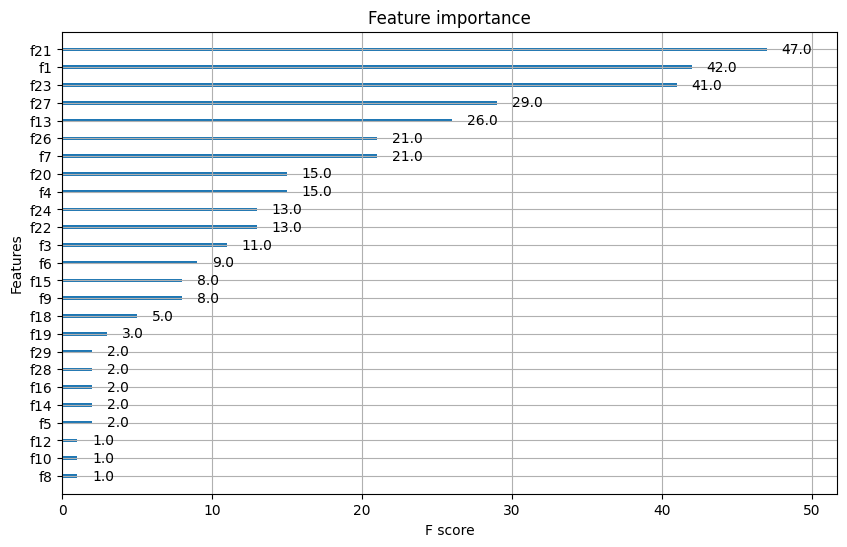

In [ ]:
# Feature Importance

from xgboost import plot_importance

plot_importance(xgb)
plt.show()

### LightGBM
- XGBoost: 균형 트리 분할(Level Wise)
- LightGBM: 리프 중심 트리 분할(Leaf Wise)

균형 vs 리프 중심 트리 분할은 가지를 균형있게 만들어 나가느냐, 아니면 필요한 부분만 더 많이 가지를 만들어가느냐의 차이

In [ ]:
#!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 2.0 MB/s eta 0:00:00


In [ ]:
import lightgbm
print(lightgbm.__version__)

4.1.0


In [ ]:
# LightGBM 모델 생성 및 학습

from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',  eval_set=evals, verbose=True)

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# 결과 예측
pred = lgbm.predict(X_test)

In [ ]:
# 평가: 오차 행렬
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)

print('Confusion Matrix\n', confusion)

In [ ]:
# 분류 리포트
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [ ]:
# Feature Importance

from lightgbm import plot_importance

plot_importance(lgbm)
plt.show()

### Ensemble - 수치 예측(Regression)

In [ ]:
# 데이터 로딩
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Machine Learning/boston.csv')
X = df.drop('target', axis=1).values
y = df['target'].values
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state=123)

#### Random Forest 적용

In [ ]:
%%time
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=0)

neg_mse_scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

#tree 1000개 만들고 cross validation도 했네 그니까 오래 걸리제

교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
교차 검증의 평균 RMSE : 4.423 
CPU times: user 24.9 s, sys: 122 ms, total: 25 s
Wall time: 35 s


#### DT, GBM, XGBoost, LightGBM

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print('교차 검증의 평균 RMSE : {:.3f} '.format(avg_rmse))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

#### Feature Importance

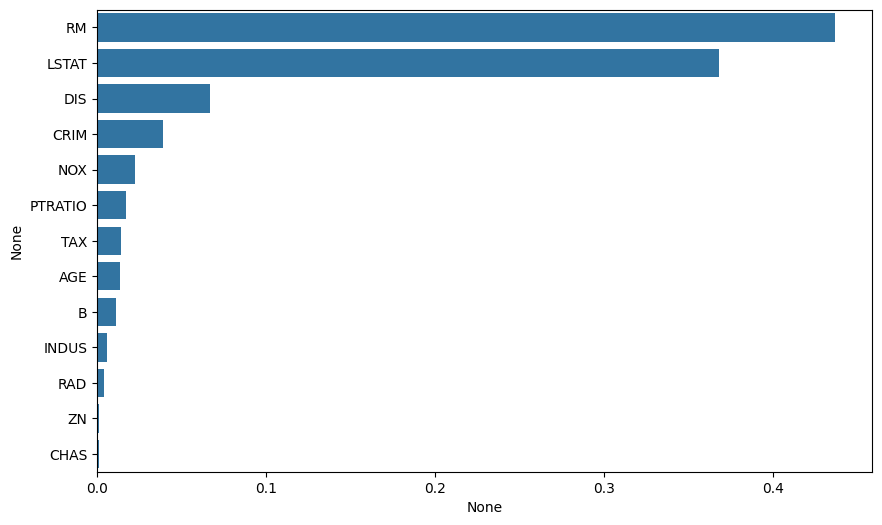

In [ ]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X, y)

sr = pd.Series(data=rf_reg.feature_importances_, index=df.drop('target', axis=1).columns)
sr = sr.sort_values(ascending=False)

sns.barplot(x= sr, y=sr.index)
plt.show()

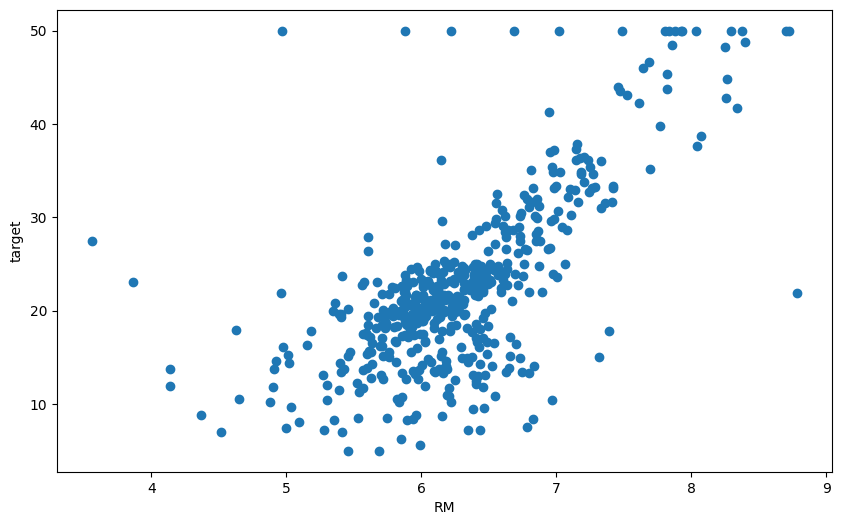

In [ ]:
plt.scatter(df['RM'] , df['target'])
plt.xlabel('RM')
plt.ylabel('target')
plt.show()

#### 결과 예측 회귀선

In [ ]:
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = df['RM'].values.reshape(-1,1)
y_target  = df['target'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


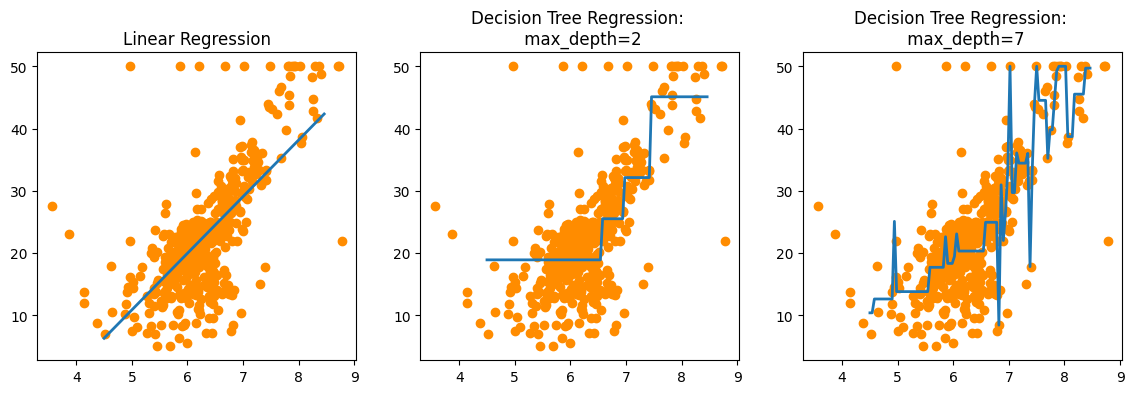

In [ ]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(df['RM'], df['target'], c='darkorange')
ax1.plot(X_test, pred_lr,label='linear', linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(df['RM'], df['target'], c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 - overfitting
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(df['RM'], df['target'], c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

plt.show()